# 1. Package Imports

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# 2. Reading data from Loan Dataset

In [98]:
urban_data = pd.read_csv("data/Urban_loans.csv")
urban_data.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Approved
0,L1,M,Yes,NaN,Grad,2600,0,115.0,NaN,3500,Yes,Y
1,L2,M,Yes,0.0,Grad,5649,1,44.0,360.0,0,Yes,Y


In [99]:
semi_urban_data = pd.read_csv("data/Semi_Urban_loans.csv")
semi_urban_data.head(2)

,LID,Gender,Applicant_Income,Dependents,Education,Marrital_Status,Self_Employed,LoanAmt,LoanAmountTerm,Coapplicant_Income,Credit_History,Approved
0,Semi76,M,9560,0,G,1.0,Yes,191.0,360,0,1.0,1
1,Semi77,M,1875,2,NG,1.0,Yes,97.0,360,1875,1.0,1


In [100]:
rural_data = pd.read_csv("data/Rural_loans.csv")
rural_data.head(2)

,Loan_ID,Sex,Marrital_Status,DependentsCount,Self_Employed,Education,Loan_Term,LoanAmount,Income,Loan_Status
0,R36,NaN,Yes,2,0.0,NG,360,112.0,3365,No
1,R37,1.0,Yes,1,0.0,NG,180,113.0,2653,No


## 2.1 Confirm the data imports

In [101]:
urban_data.shape

(35, 12)

In [102]:
semi_urban_data.shape

(39, 12)

In [103]:
rural_data.shape

(40, 10)

## 2.2 Quick look at the columns

In [104]:
urban_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved'],
      dtype='object')

In [105]:
semi_urban_data.columns

Index(['LID', 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       'Marrital_Status', 'Self_Employed', 'LoanAmt', 'LoanAmountTerm',
       'Coapplicant_Income', 'Credit_History', 'Approved'],
      dtype='object')

In [106]:
rural_data.columns

Index(['Loan_ID', 'Sex', 'Marrital_Status', 'DependentsCount', 'Self_Employed',
       'Education', 'Loan_Term', 'LoanAmount', 'Income', 'Loan_Status'],
      dtype='object')

# 3. Data Preparation

In [107]:
mega_columns = set(urban_data.columns.append(semi_urban_data.columns).append(rural_data.columns))
mega_columns

{'Applicant_Income',
 'Approved',
 'CoapplicantIncome',
 'Coapplicant_Income',
 'Credit_History',
 'Dependents',
 'DependentsCount',
 'Education',
 'Gender',
 'Income',
 'LID',
 'LoanAmount',
 'LoanAmountTerm',
 'LoanAmt',
 'Loan_Amt',
 'Loan_ID',
 'Loan_Status',
 'Loan_Term',
 'Married',
 'Marrital_Status',
 'Self_Employed',
 'Sex',
 'Tenure'}

### 3.1 Findings

- Loan_Id and LID seems to be same
- CoapplicantIncome and Coapplicant_Income seems to be same
- Dependents and DependentsCount seems to be same
- LoanAmount, LoanAmt, Loan_Amt seems to be same
- Married and Marrital_Status seems to be same
- Gender and Sex seems to be same.
- Approved, Loan_Status seems to be same.


So, we can merge the columns as :

- Loan_ID
- Gender
- Married
- Tenure
- Education
- Self_Employed
- Income
- Coapplicant_Income
- Credit_History
- Dependents
- Loan_Amount
- Approved (Target)

### 3.2 Checking for Unique data values

In [108]:
# 'Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education', 'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
#  'CoapplicantIncome', 'Credit_History', 'Approved'
print(urban_data['Gender'].unique())
print(urban_data['Married'].unique())
print(urban_data['Self_Employed'].unique())
print(urban_data['Education'].unique())
print(urban_data['Credit_History'].unique())
print(urban_data['Approved'].unique())

['M' nan 'F']
['Yes' 'No']
[nan  0.  1.]
['Grad' 'NonGrad']
['Yes' 'No' nan]
['Y' 'N']


In [109]:
# 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       #'Marrital_Status', 'Self_Employed', 'LoanAmt', 'LoanAmountTerm',
       #'Coapplicant_Income', 'Credit_History', 'Approved'

print(semi_urban_data['Gender'].unique())
print(semi_urban_data['Marrital_Status'].unique())
print(semi_urban_data['Self_Employed'].unique())
print(semi_urban_data['Education'].unique())
print(semi_urban_data['Credit_History'].unique())
print(semi_urban_data['Approved'].unique())

['M' 'F' nan]
[ 1. -1. nan]
['Yes' 'No' nan]
['G' 'NG']
[ 1. nan  0.]
[1 0]


In [110]:
#'Sex', 'Marrital_Status', 'DependentsCount', 'Self_Employed',
   #    'Education', 'Loan_Term', 'LoanAmount', 'Income', 'Loan_Status'

print(rural_data['Sex'].unique())
print(rural_data["Marrital_Status"].unique())
print(rural_data['Self_Employed'].unique())
print(rural_data['Education'].unique())
print(rural_data['Loan_Status'].unique())

[nan  1.  0.]
['Yes' 'No']
[ 0.  1. nan]
['NG' 'G']
['No' 'Yes']


### 3.3 Standardize Urban Loan Data

In [111]:
"""
- Loan_ID
- Gender
- Married
- Tenure
- Education
- Self_Employed
- Income
- Coapplicant_Income
- Credit_History
- Dependents
- Loan_Amount
- Approved (Target)
"""

urban_df = pd.DataFrame()
urban_df['Loan_ID'] = urban_data['Loan_ID']
urban_df['Gender'] = urban_data['Gender']
urban_df['Married'] = urban_data['Married']
urban_df['Tenure'] = urban_data['Tenure']
urban_df['Self_Employed'] = urban_data['Self_Employed']
urban_df['Education'] = urban_data['Education']
urban_df['Applicant_Income'] = urban_data['Applicant_Income']
urban_df['Dependents'] = urban_data['Dependents']
urban_df['Loan_Amount'] = urban_data['Loan_Amt']
urban_df['Coapplicant_Income'] = urban_data['CoapplicantIncome']
urban_df['Credit_History'] = urban_data['Credit_History']
urban_df['Property_Location'] = "URBAN"
urban_df['Approved'] = urban_data['Approved']

urban_df.head(2)

,Loan_ID,Gender,Married,Tenure,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amount,Coapplicant_Income,Credit_History,Property_Location,Approved
0,L1,M,Yes,NaN,NaN,Grad,2600,0,115.0,3500,Yes,URBAN,Y
1,L2,M,Yes,360.0,0.0,Grad,5649,1,44.0,0,Yes,URBAN,Y


In [112]:
urban_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Tenure', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amount', 'Coapplicant_Income',
       'Credit_History', 'Property_Location', 'Approved'],
      dtype='object')

### 3.4 Standardize Semi-Urban Loan Data

In [113]:
# Marital Status
# semi_urban_data['Marrital_Status'].replace(1, 'Yes', inplace=True)
# semi_urban_data['Marrital_Status'].replace(-1, 'No', inplace=True)
# Use loc to update the DataFrame directly
semi_urban_data['Marrital_Status'].astype(str)
semi_urban_data.loc[semi_urban_data['Marrital_Status'] == 1, 'Marrital_Status'] = 'Yes'
semi_urban_data.loc[semi_urban_data['Marrital_Status'] == -1, 'Marrital_Status'] = 'No'

semi_urban_data['Marrital_Status'][:5]

C:\Users\Mukund\AppData\Local\Temp\ipykernel_23424\3587736960.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  semi_urban_data.loc[semi_urban_data['Marrital_Status'] == 1, 'Marrital_Status'] = 'Yes'


0    Yes
1    Yes
2    Yes
3     No
4     No
Name: Marrital_Status, dtype: object

In [114]:
# Self Employed
semi_urban_data.loc[semi_urban_data['Self_Employed'] == 'Yes', 'Self_Employed'] = 1
semi_urban_data.loc[semi_urban_data['Self_Employed'] == 'No', 'Self_Employed'] = 0

semi_urban_data['Self_Employed'][:5]

0    1
1    1
2    0
3    0
4    0
Name: Self_Employed, dtype: object

In [115]:
# Education
semi_urban_data.loc[semi_urban_data['Education'] == 'G', 'Education'] = 'Grad'
semi_urban_data.loc[semi_urban_data['Education'] == 'NG', 'Education'] = 'NonGrad'

semi_urban_data['Education'][:5]

0       Grad
1    NonGrad
2       Grad
3    NonGrad
4       Grad
Name: Education, dtype: object

In [116]:
# Credit History
semi_urban_data['Credit_History'].astype(str)
semi_urban_data.loc[semi_urban_data['Credit_History'] == 1, 'Credit_History'] = 'Yes'
semi_urban_data.loc[semi_urban_data['Credit_History'] == 0, 'Credit_History'] = 'No'

semi_urban_data['Credit_History'][:5]

C:\Users\Mukund\AppData\Local\Temp\ipykernel_23424\2851903993.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  semi_urban_data.loc[semi_urban_data['Credit_History'] == 1, 'Credit_History'] = 'Yes'


0    Yes
1    Yes
2    NaN
3    Yes
4     No
Name: Credit_History, dtype: object

In [117]:
# Approved
semi_urban_data['Approved'].astype(str)
semi_urban_data.loc[semi_urban_data['Approved'] == 1, 'Approved'] = 'Y'
semi_urban_data.loc[semi_urban_data['Approved'] == 0, 'Approved'] = 'N'

semi_urban_data['Approved'][:5]

C:\Users\Mukund\AppData\Local\Temp\ipykernel_23424\2351587862.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Y' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  semi_urban_data.loc[semi_urban_data['Approved'] == 1, 'Approved'] = 'Y'


0    Y
1    Y
2    N
3    Y
4    N
Name: Approved, dtype: object

In [118]:
"""
'Loan_ID', 
'Gender', 
'Married', 
'Tenure', 
'Self_Employed', 
'Education',
'Applicant_Income', 
'Dependents', 
'Loan_Amount', 
'Coapplicant_Income',
'Credit_History', 
'Property_Location', 
'Approved'
"""

semi_urban_df = pd.DataFrame()
semi_urban_df['Loan_ID'] = semi_urban_data['LID']
semi_urban_df['Gender'] = semi_urban_data['Gender']
semi_urban_df['Married'] = semi_urban_data['Marrital_Status']
semi_urban_df['Tenure'] = semi_urban_data['LoanAmountTerm']
semi_urban_df['Self_Employed'] = semi_urban_data['Self_Employed']
semi_urban_df['Education'] = semi_urban_data['Education']
semi_urban_df['Applicant_Income'] = semi_urban_data['Applicant_Income']
semi_urban_df['Dependents'] = semi_urban_data['Dependents']
semi_urban_df['Loan_Amount'] = semi_urban_data['LoanAmt']
semi_urban_df['Coapplicant_Income'] = semi_urban_data['Coapplicant_Income']
semi_urban_df['Credit_History'] = semi_urban_data['Credit_History']
semi_urban_df['Property_Location'] = "SEMI_URBAN"
semi_urban_df['Approved'] = semi_urban_data['Approved']

semi_urban_df.head(2)

,Loan_ID,Gender,Married,Tenure,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amount,Coapplicant_Income,Credit_History,Property_Location,Approved
0,Semi76,M,Yes,360,1,Grad,9560,0,191.0,0,Yes,SEMI_URBAN,Y
1,Semi77,M,Yes,360,1,NonGrad,1875,2,97.0,1875,Yes,SEMI_URBAN,Y


In [119]:
semi_urban_df.columns == urban_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

### 3.5 Standardize Rural Loan Data

In [120]:
# Sex / Gender
rural_data['Sex'].astype(str)
rural_data.loc[rural_data['Sex'] == 1, 'Sex'] = 'M'
rural_data.loc[rural_data['Sex'] == 0, 'Sex'] = 'F'

rural_data['Sex'][:5]

C:\Users\Mukund\AppData\Local\Temp\ipykernel_23424\1880561466.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rural_data.loc[rural_data['Sex'] == 1, 'Sex'] = 'M'


0    NaN
1      M
2      M
3      M
4      M
Name: Sex, dtype: object

In [121]:
# Education
rural_data.loc[rural_data['Education'] == 'G', 'Education'] = 'Grad'
rural_data.loc[rural_data['Education'] == 'NG', 'Education'] = 'NonGrad'

rural_data['Education'][:5]

0    NonGrad
1    NonGrad
2       Grad
3       Grad
4       Grad
Name: Education, dtype: object

In [122]:
# Loan Status
rural_data.loc[rural_data['Loan_Status'] == 'Yes', 'Loan_Status'] = 'Y'
rural_data.loc[rural_data['Loan_Status'] == 'No', 'Loan_Status'] = 'N'

rural_data['Loan_Status'][:5]

0    N
1    N
2    Y
3    N
4    Y
Name: Loan_Status, dtype: object

In [123]:
"""
'Loan_ID', 
'Gender', 
'Married', 
'Tenure', 
'Self_Employed', 
'Education',
'Applicant_Income', 
'Dependents', 
'Loan_Amount', 
'Coapplicant_Income',
'Credit_History', 
'Property_Location', 
'Approved'
"""

rural_df = pd.DataFrame()
rural_df['Loan_ID'] = rural_data['Loan_ID']
rural_df['Gender'] = rural_data['Sex']
rural_df['Married'] = rural_data['Marrital_Status']
rural_df['Tenure'] = rural_data['Loan_Term']
rural_df['Self_Employed'] = rural_data['Self_Employed']
rural_df['Education'] = rural_data['Education']
rural_df['Applicant_Income'] = rural_data['Income']
rural_df['Dependents'] = rural_data['DependentsCount']
rural_df['Loan_Amount'] = rural_data['LoanAmount']
rural_df['Coapplicant_Income'] = 0
rural_df['Credit_History'] = 'No'
rural_df['Property_Location'] = 'RURAL'
rural_df['Approved'] = rural_data['Loan_Status']

rural_df.head(2)

,Loan_ID,Gender,Married,Tenure,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amount,Coapplicant_Income,Credit_History,Property_Location,Approved
0,R36,NaN,Yes,360,0.0,NonGrad,3365,2,112.0,0,No,RURAL,N
1,R37,M,Yes,180,0.0,NonGrad,2653,1,113.0,0,No,RURAL,N


## 3.6. Merge all the dataframes (urban_df, semi_urban_df, and rural_df)

In [124]:
loan_data = pd.concat([urban_df, semi_urban_df, rural_df])

loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Tenure', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amount', 'Coapplicant_Income',
       'Credit_History', 'Property_Location', 'Approved'],
      dtype='object')

In [125]:
loan_data.head()

,Loan_ID,Gender,Married,Tenure,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amount,Coapplicant_Income,Credit_History,Property_Location,Approved
0,L1,M,Yes,NaN,NaN,Grad,2600,0,115.0,3500,Yes,URBAN,Y
1,L2,M,Yes,360.0,0.0,Grad,5649,1,44.0,0,Yes,URBAN,Y
2,L3,M,Yes,240.0,0.0,Grad,3988,1,50.0,0,Yes,URBAN,Y
3,L4,M,Yes,360.0,1.0,Grad,3316,2,88.0,3500,Yes,URBAN,Y
4,L5,NaN,Yes,300.0,0.0,Grad,51763,3+,700.0,0,Yes,URBAN,Y


In [126]:
loan_data.shape

(114, 13)

# 4. Exploratory Data Analysis (EDA)

## 4.1 Univariate Analysis

In [127]:
from matplotlib import colormaps

cmap_jet = colormaps.get_cmap('jet')
cmap_spect = colormaps.get_cmap('Spectral')

### 4.1.1 Explore Target Variable

In [128]:
loan_data['Approved'].value_counts()

Approved
Y    74
N    40
Name: count, dtype: int64

In [129]:
# Percentage of locan approved
74/(74 + 40)

0.6491228070175439

Almost 64.9% of loans are approved! (74/(74 + 40))

<Axes: title={'center': 'Approved'}, ylabel='Approved'>

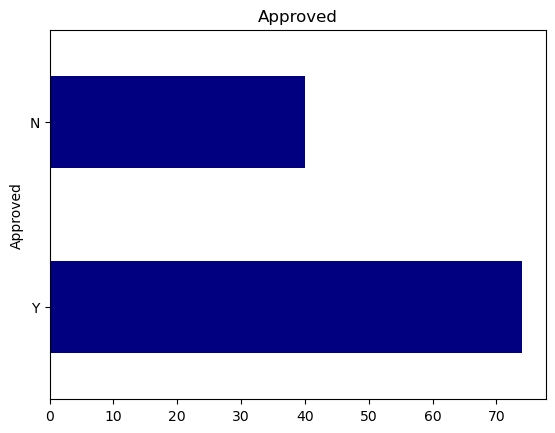

In [130]:
loan_data['Approved'].value_counts().plot.barh(cmap = cmap_jet, title='Approved')

### 4.1.2 Explore Categorial (Nominal) Indepdent Variables

Let's try to understand Categorical variables like 'Gender', 'Married', 'Self_Employed', and 'Credit_History'.

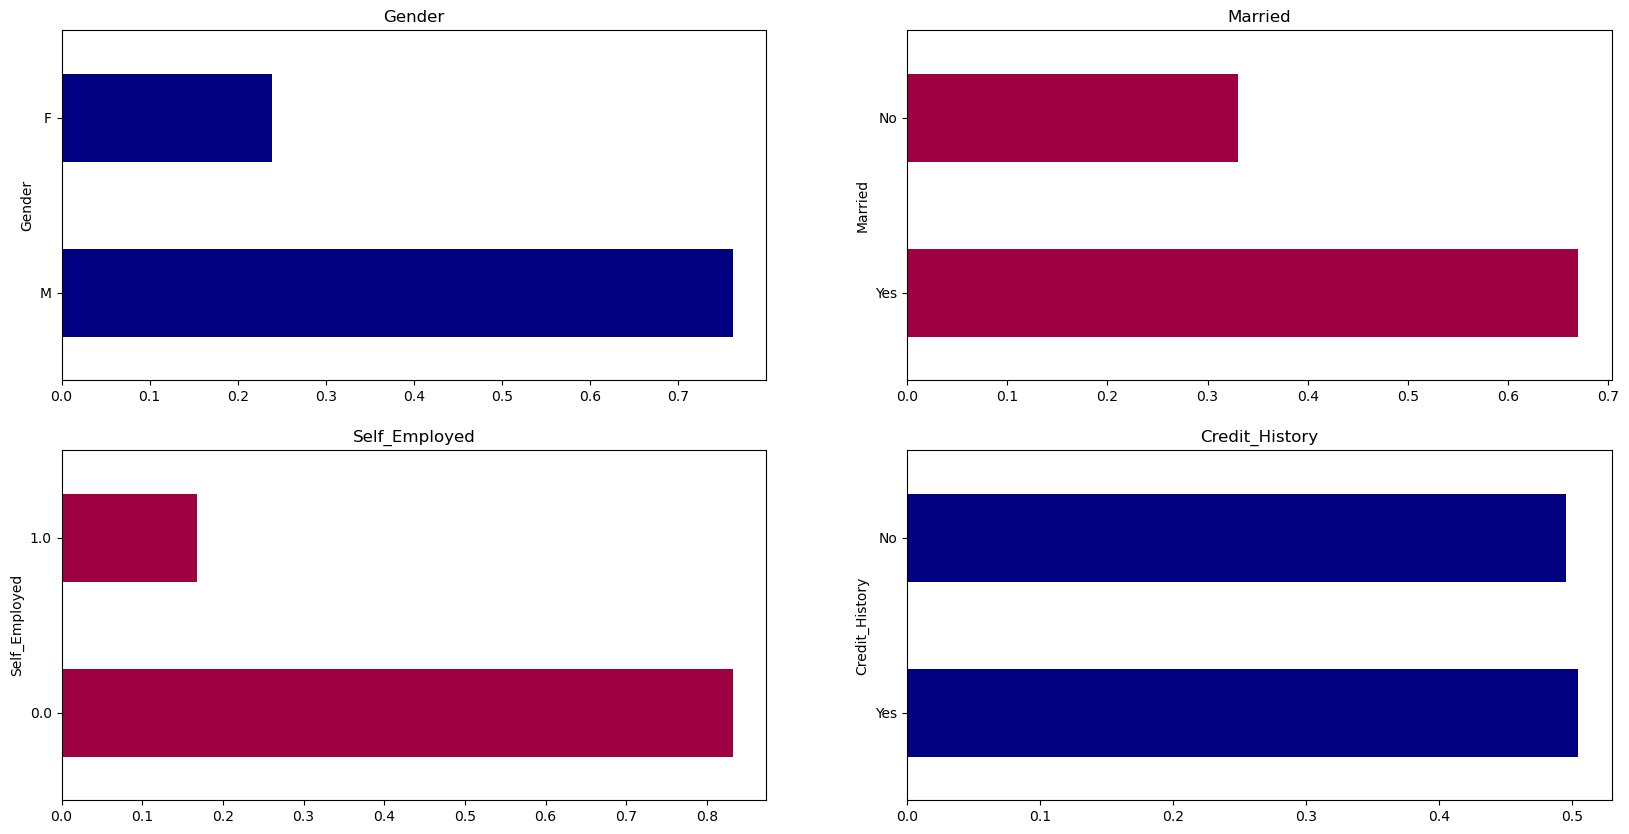

In [131]:
# Prepare a 2x2 layout to render thse categorical attributes
plt.figure(1)

plt.subplot(221)
loan_data['Gender'].value_counts(normalize=True).plot.barh(figsize = (20, 10), cmap = cmap_jet, title = 'Gender')

plt.subplot(222)
loan_data['Married'].value_counts(normalize=True).plot.barh(figsize = (20, 10), cmap = cmap_spect, title = 'Married')

plt.subplot(223)
loan_data['Self_Employed'].value_counts(normalize=True).plot.barh(figsize = (20, 10), cmap = cmap_spect, title = 'Self_Employed')

plt.subplot(224)
loan_data['Credit_History'].value_counts(normalize=True).plot.barh(cmap=cmap_jet, title='Credit_History')

plt.show()

Inference from the above plot:
- ~75% applicants are male
- 67% applicants are married
- 15% applicants are self employed
- Almost equal numbers of applicants are in rugular and defaulter list.


### 4.1.2 Explore Categorical (Ordinal) Independent variables

Let's understand more about 'Dependents', 'Education', and 'Property_Location'

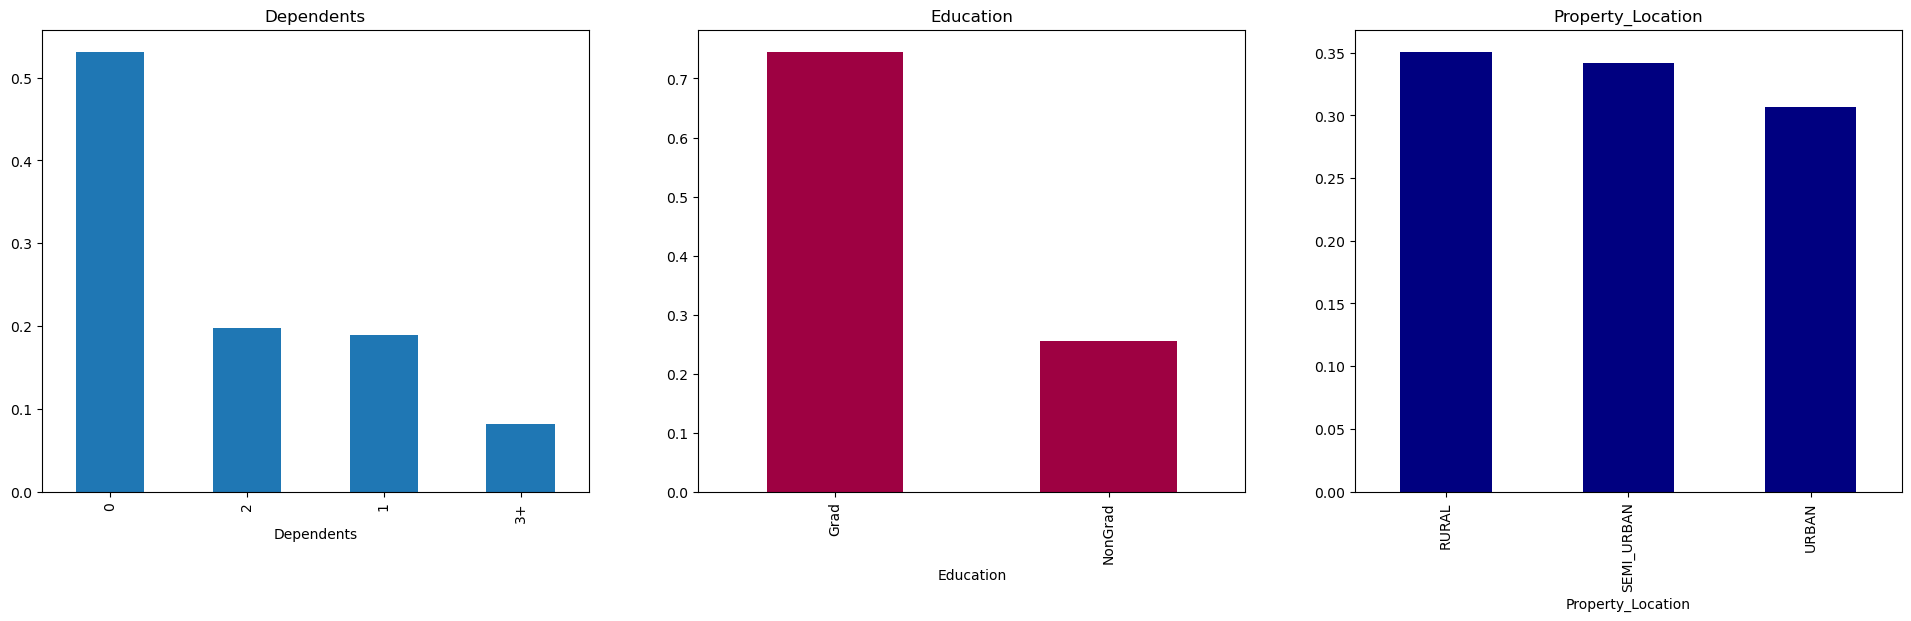

In [132]:
# 1x3 layout 
plt.figure(1)

plt.subplot(131)
loan_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24, 6), title='Dependents')

plt.subplot(132)
loan_data['Education'].value_counts(normalize=True).plot.bar(title='Education', cmap=cmap_spect)

plt.subplot(133)
loan_data['Property_Location'].value_counts(normalize=True).plot.bar(title='Property_Location', cmap=cmap_jet)

plt.show()

Inference from the above plot:
1. Applicants with no dependents are taking more loans.
2. More educated applications are demanding the loans.
3. Equal number of samples are drawn from all three localities.

### 4.1.3 Explore numerical Indepdendent Variables

C:\Users\Mukund\AppData\Local\Temp\ipykernel_23424\3023381761.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['Applicant_Income'], kde=False, hist=True)


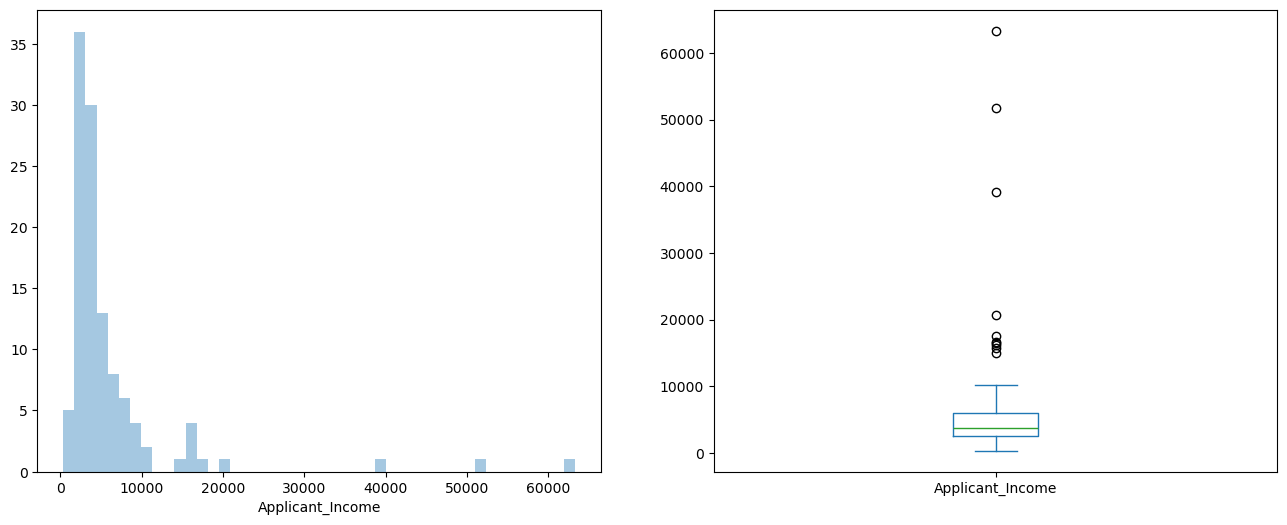

In [133]:
# Application Income
import matplotlib
import matplotlib.pyplot


plt.figure(1)

plt.subplot(121)
sns.distplot(loan_data['Applicant_Income'], kde=False, hist=True)

plt.subplot(122)
loan_data['Applicant_Income'].plot.box(figsize=(16,6))

plt.show()


Inference from the above plot:
1. Application_Income is tilted left side. Need to normalize it further.
2. Almost all Applicant_Income is less than 1000, but still there are outliers.

Now, Let's explore if 'Education' has impact on income or not.

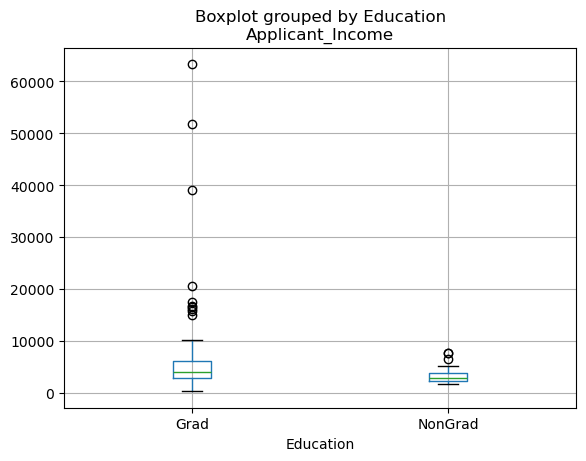

In [134]:
loan_data.boxplot(column='Applicant_Income', by='Education', grid=True)
plt.show()

Inference from the above plot:
1. Graduates tends to earn more income than non-graduates.
2. People with higher income tends be graduates.

Now, let's see co-application's income distribution.

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


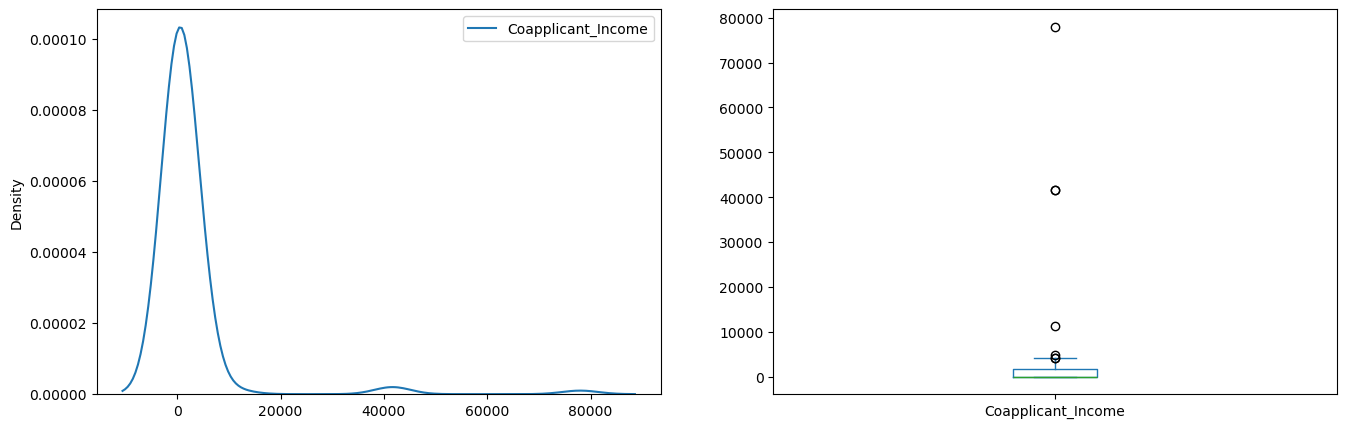

In [135]:
from sympy import true


plt.figure(1)

# plt.subplot(221)
# sns.distplot(loan_data['Coapplicant_Income'], hist=False, kde=True)

# plt.subplot(222)
# sns.histplot(loan_data[['Coapplicant_Income']], kde=True, stat='density')

plt.subplot(122)
loan_data['Coapplicant_Income'].plot.box(figsize=(16,5))

plt.subplot(121)
sns.kdeplot(loan_data[['Coapplicant_Income']])

plt.show()

Inference from the above plot:
1. Coapplicant_Income has similar distribution as Applicant_Income. Need to normalize it.

Now, let's look at the Loan_Amount distribution.

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


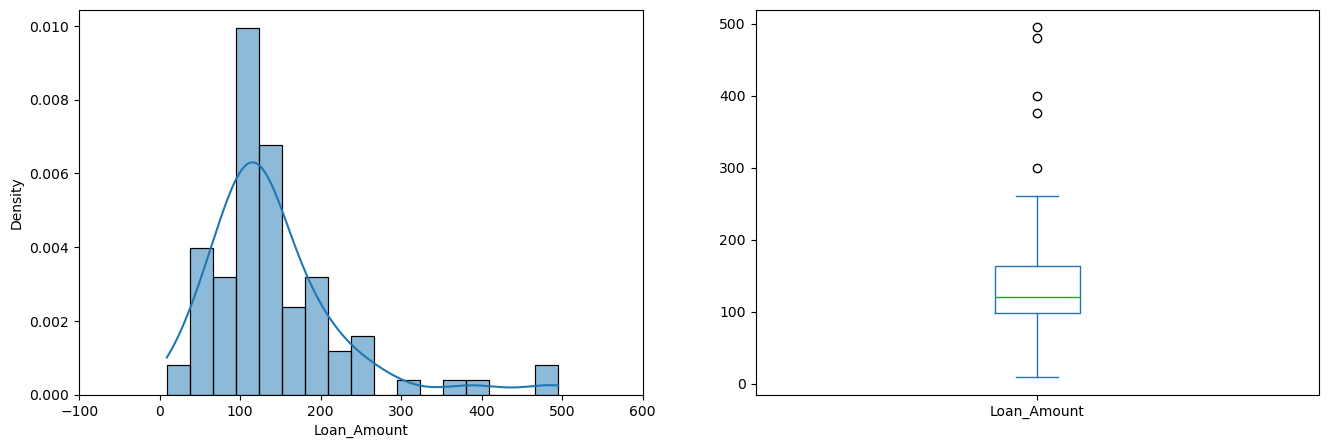

In [136]:
plt.figure(1)

plt.subplot(121)
loan_df = loan_data.dropna()
sns.histplot(loan_df['Loan_Amount'], kde=True, stat='density')
plt.xlim(-100, 600)


plt.subplot(122)
loan_df['Loan_Amount'].plot.box(figsize=(16,5))

plt.show()

Inference from the above plot:
1. Loan_Amount follow normal distribution with some outliers. Need to handle it.

## 4.2 Bivariate Analysis

#### 4.2.1 Compare Categorical variable with Target

Let's explore relatinship between 'Gender' and 'Approval'.

In [137]:
Gender = pd.crosstab(loan_data['Gender'], loan_data['Approved'])
Gender

Approved,N,Y
Gender,,
F,15,11
M,23,60


<Axes: ylabel='Gender'>

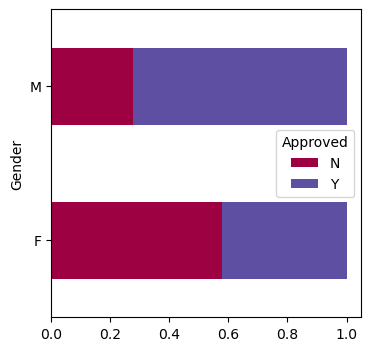

In [138]:

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='barh', cmap=cmap_spect, stacked=True, figsize=(4,4))

Inference from above plot:
- More or less same number of male/females are given loans or declined loans.
- Proportion of Male applicant has higher approval rate.
- Proportion of Female applicant has higher rejection rate.

Now, let's visualize the remaining categorical variables vs target variable.

Approved   N   Y
Married         
No        17  20
Yes       23  52


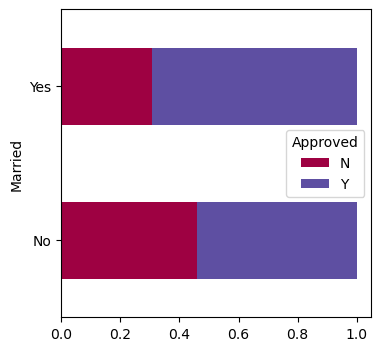

In [139]:
Married = pd.crosstab(loan_data['Married'], loan_data['Approved'])
print(Married)
Married.div(Married.sum(1).astype(float), axis= 0).plot(kind='barh', cmap=cmap_spect, stacked=True, figsize=(4,4))
plt.show()

Inference from the above plot:
- Proportion for approval for married applicant is higher.
- Proportion of rejection is higher for unmarried applicant.

Now, let's explore the relationship between dependents and loan_pproval rate.

Approved     N   Y
Dependents        
0           20  39
1            7  14
2            8  14
3+           5   4


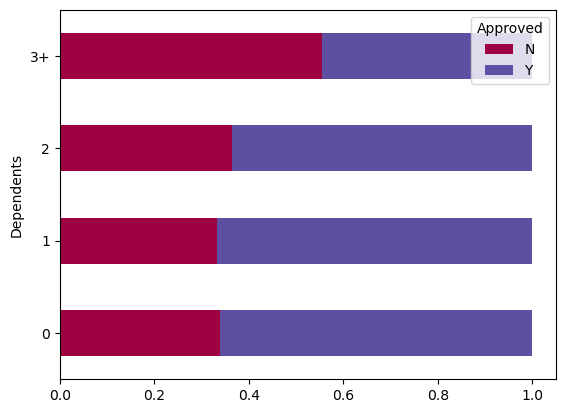

In [140]:
Dependents = pd.crosstab(loan_data['Dependents'], loan_data['Approved'])
print(Dependents)

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='barh', cmap=cmap_spect, stacked=True)
plt.show()

Inference from the above plot:
- (2/3) of the applicants are approved for loan with dependents as 0, 1 and 2
- For applicants with 3+ dependents, loan approval is ~50%.

Now, Let's explore education and approval rate.

Approved    N   Y
Education        
Grad       27  58
NonGrad    13  16


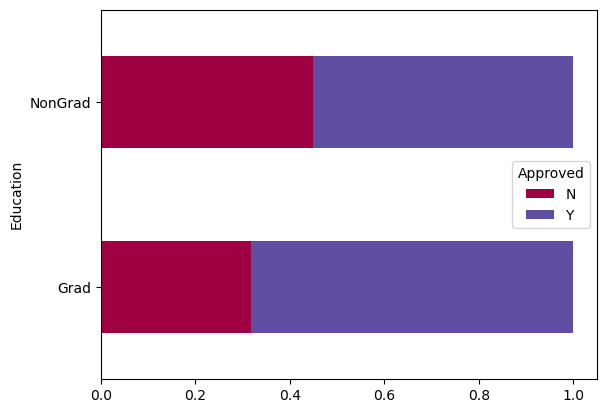

In [141]:
Education = pd.crosstab(loan_data['Education'], loan_data['Approved'])
print(Education)

Education.div(Education.sum(1).astype(float), axis=0).plot(kind='barh', cmap=cmap_spect, stacked=True)
plt.show()

Inference from above plot:
- Loan approval for grad applicant is higher than non-grad.

Now, let's explore self_employed vs Approval rate.

Approved        N   Y
Self_Employed        
0.0            31  58
1.0             6  12


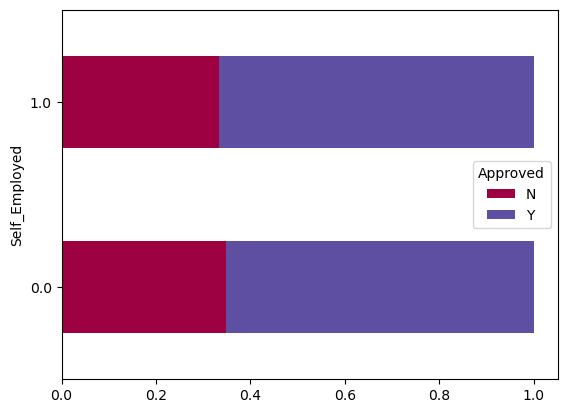

In [142]:
Self_Employed = pd.crosstab(loan_data['Self_Employed'], loan_data['Approved'])
print(Self_Employed)

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='barh', cmap=cmap_spect, stacked=True)
plt.show()

Inference from the above plot:
- There is no significant difference in loan approval for a self_employed or non-self_employed

Now, let's explore Credit_History vs Loan approval.

Approved         N   Y
Credit_History        
No              28  25
Yes              9  45


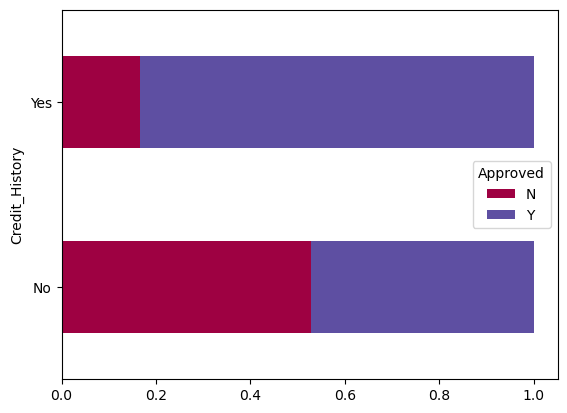

In [143]:
Credit_History = pd.crosstab(loan_data['Credit_History'], loan_data['Approved'])
print(Credit_History)

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='barh', cmap=cmap_spect, stacked=True)
plt.show()

Inference from the above plot:
- Credit_History has huge impact on loan approval.

Now, let's explore if property_location has any impact on loan approval

Approved            N   Y
Property_Location        
RURAL              15  25
SEMI_URBAN         10  29
URBAN              15  20


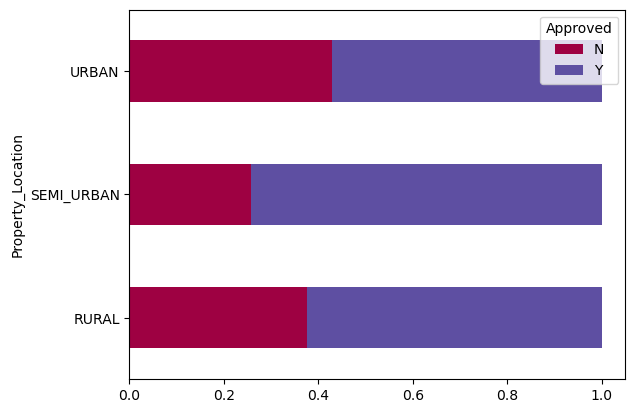

In [144]:
Property_Location = pd.crosstab(loan_data['Property_Location'], loan_data['Approved'])
print(Property_Location)

Property_Location.div(Property_Location.sum(1).astype(float), axis=0).plot(kind='barh', cmap=cmap_spect, stacked=True)
plt.show()

Inference from the above plot:
- Semi-urban location has higher chances of loan approval.

Correlation matrix:

<Axes: >

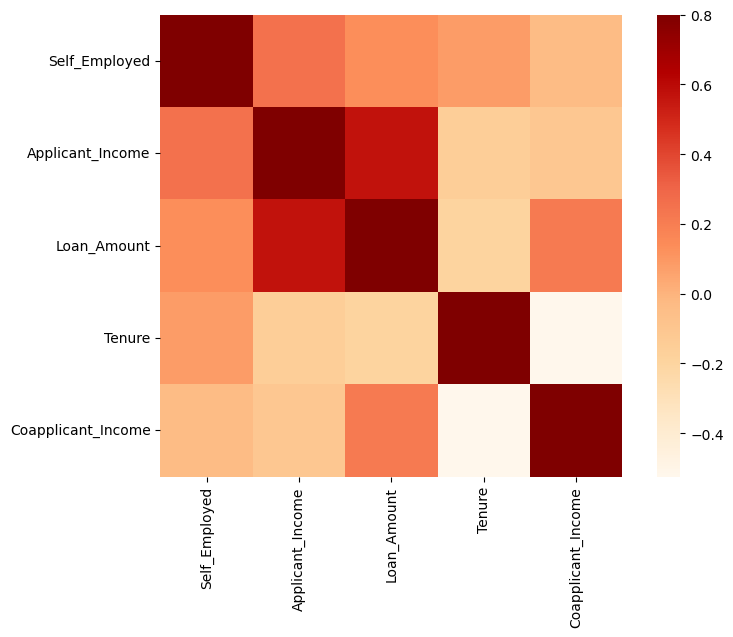

In [145]:
cor_matrix = loan_data[['Self_Employed', 'Applicant_Income', 'Loan_Amount', 'Tenure', 'Coapplicant_Income']].corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(cor_matrix, vmax=0.8, square=True, cmap='OrRd')

# 5. Feature Engineering

## 5.1 Handling missing values

In [146]:
loan_data.isnull().sum()

Loan_ID               0
Gender                5
Married               2
Tenure                2
Self_Employed         7
Education             0
Applicant_Income      0
Dependents            3
Loan_Amount           7
Coapplicant_Income    0
Credit_History        7
Property_Location     0
Approved              0
dtype: int64

In [147]:
# loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
# loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
# loan_data['Tenure'].fillna(loan_data['Tenure'].mode()[0], inplace=True)
# loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
# loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
# loan_data['Loan_Amount'].fillna(loan_data['Loan_Amount'].median(), inplace=True)
# loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

loan_data.loc[loan_data['Gender'].isnull(), 'Gender'] = loan_data['Gender'].mode()[0]
loan_data.loc[loan_data['Married'].isnull(), 'Married'] = loan_data['Married'].mode()[0]
loan_data.loc[loan_data['Tenure'].isnull(), 'Tenure'] = loan_data['Tenure'].mode()[0]
loan_data.loc[loan_data['Dependents'].isnull(), 'Dependents'] = loan_data['Dependents'].mode()[0]
loan_data.loc[loan_data['Self_Employed'].isnull(), 'Self_Employed'] = loan_data['Self_Employed'].mode()[0]
loan_data.loc[loan_data['Loan_Amount'].isnull(), 'Loan_Amount'] = loan_data['Loan_Amount'].median()
loan_data.loc[loan_data['Credit_History'].isnull(), 'Credit_History'] = loan_data['Credit_History'].mode()[0]


In [148]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Tenure                0
Self_Employed         0
Education             0
Applicant_Income      0
Dependents            0
Loan_Amount           0
Coapplicant_Income    0
Credit_History        0
Property_Location     0
Approved              0
dtype: int64

## 5.2 Handling outliers

<Axes: >

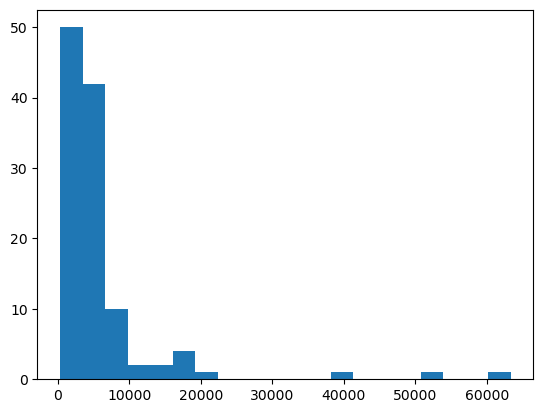

In [149]:
loan_data['Applicant_Income'].hist(bins=20, grid=False)

<Axes: >

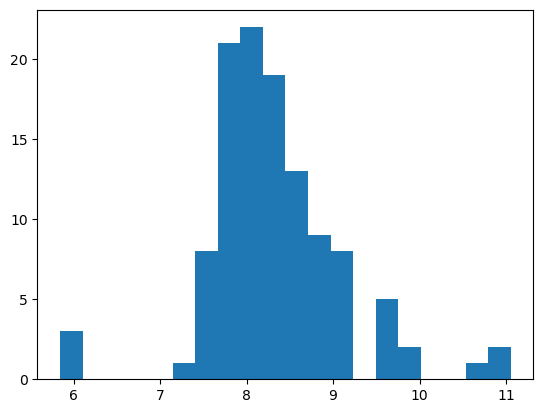

In [150]:
loan_data['Applicant_Income_Log'] = np.log(loan_data['Applicant_Income'])
loan_data['Applicant_Income_Log'].hist(bins=20, grid=False)

<Axes: >

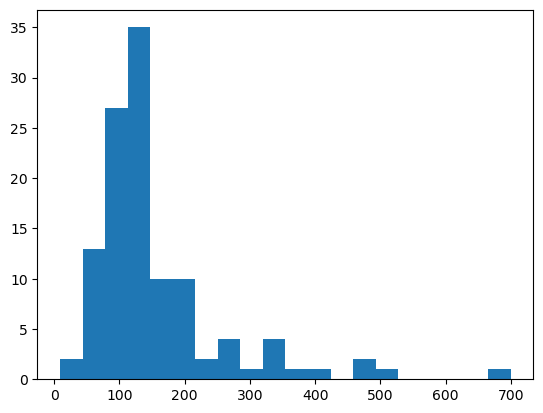

In [151]:
loan_data['Loan_Amount'].hist(bins=20, grid=False)

<Axes: >

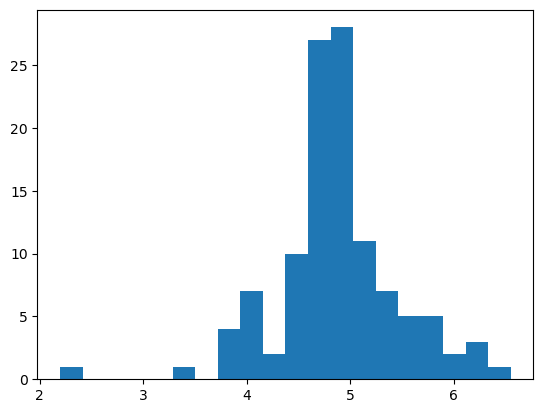

In [152]:
loan_data['Loan_Amount_Log'] = np.log(loan_data['Loan_Amount'])
loan_data['Loan_Amount_Log'].hist(bins=20, grid=False)

## 5.3 Datatype conversion

In [153]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               114 non-null    object 
 1   Gender                114 non-null    object 
 2   Married               114 non-null    object 
 3   Tenure                114 non-null    float64
 4   Self_Employed         114 non-null    object 
 5   Education             114 non-null    object 
 6   Applicant_Income      114 non-null    int64  
 7   Dependents            114 non-null    object 
 8   Loan_Amount           114 non-null    float64
 9   Coapplicant_Income    114 non-null    int64  
 10  Credit_History        114 non-null    object 
 11  Property_Location     114 non-null    object 
 12  Approved              114 non-null    object 
 13  Applicant_Income_Log  114 non-null    float64
 14  Loan_Amount_Log       114 non-null    float64
dtypes: float64(4), int64(2), obje

In [154]:
loan_data = loan_data.astype({'Gender':'category', 'Married':'category', 'Education':'category',
'Dependents':'category', 'Credit_History':'category', 'Property_Location':'category', 'Approved':'category'})

In [155]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Loan_ID               114 non-null    object  
 1   Gender                114 non-null    category
 2   Married               114 non-null    category
 3   Tenure                114 non-null    float64 
 4   Self_Employed         114 non-null    object  
 5   Education             114 non-null    category
 6   Applicant_Income      114 non-null    int64   
 7   Dependents            114 non-null    category
 8   Loan_Amount           114 non-null    float64 
 9   Coapplicant_Income    114 non-null    int64   
 10  Credit_History        114 non-null    category
 11  Property_Location     114 non-null    category
 12  Approved              114 non-null    category
 13  Applicant_Income_Log  114 non-null    float64 
 14  Loan_Amount_Log       114 non-null    float64 
dtypes: category(

## 5.3 Feature Creation

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Income', ylabel='Count'>

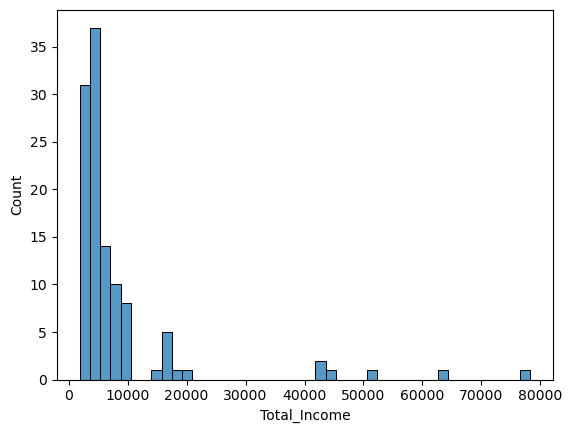

In [156]:
loan_data['Total_Income'] = loan_data['Applicant_Income'] + loan_data['Coapplicant_Income']

sns.histplot(loan_data['Total_Income'], kde=False)

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Income_Log', ylabel='Count'>

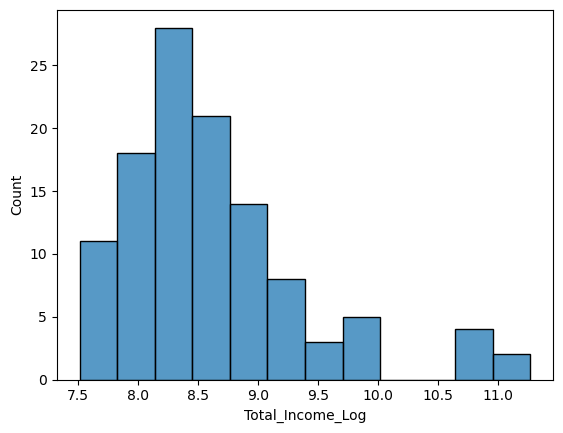

In [157]:
loan_data['Total_Income_Log'] = np.log(loan_data['Total_Income'])
sns.histplot(loan_data['Total_Income_Log'], kde=False)

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Count'>

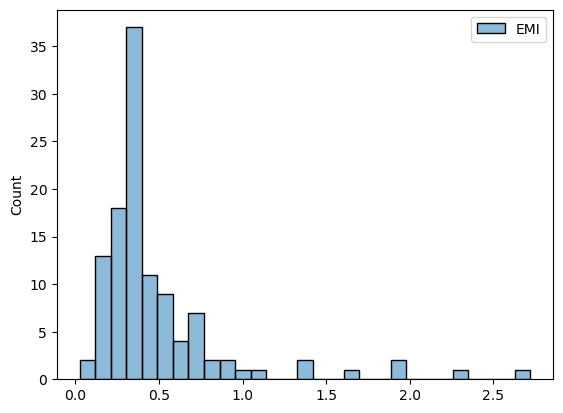

In [158]:
# EMI
loan_data['EMI'] = loan_data['Loan_Amount'] / loan_data['Tenure']

sns.histplot(loan_data[['EMI']], kde=False)

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Count'>

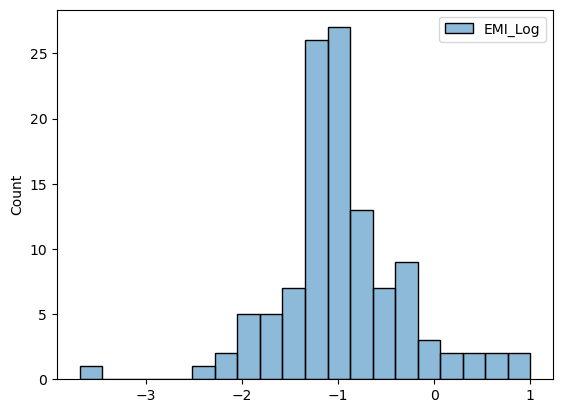

In [159]:
loan_data['EMI_Log'] = np.log(loan_data['EMI'])
sns.histplot(loan_data[['EMI_Log']], kde=False)

Now, let's explore balance income after paying EMI.

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


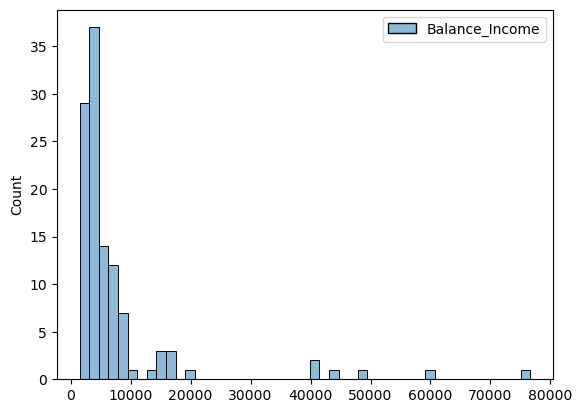

In [160]:
loan_data['Balance_Income'] = loan_data['Total_Income'] - (loan_data['EMI'] * 1000)

sns.histplot(loan_data[['Balance_Income']], kde=False)
plt.show()

c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Mukund\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


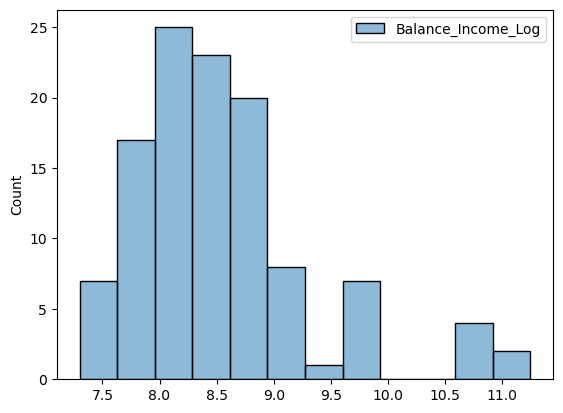

In [161]:
loan_data['Balance_Income_Log'] = np.log(loan_data['Balance_Income'])
sns.histplot(loan_data[['Balance_Income_Log']], kde=False)
plt.show()

Now, we can drop columns : "Applicant_Income", "Coapplicant_Income", "Loan_Amount", "Tenure", "Total_Income", "EMI", "Balance_Income" from loan_data dataframe.

In [162]:
loan_data = loan_data.drop(["Applicant_Income", "Coapplicant_Income", "Loan_Amount", "Tenure", "Total_Income", "Total_Income", "EMI", "Balance_Income"], axis=1)

In [163]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Loan_ID               114 non-null    object  
 1   Gender                114 non-null    category
 2   Married               114 non-null    category
 3   Self_Employed         114 non-null    object  
 4   Education             114 non-null    category
 5   Dependents            114 non-null    category
 6   Credit_History        114 non-null    category
 7   Property_Location     114 non-null    category
 8   Approved              114 non-null    category
 9   Applicant_Income_Log  114 non-null    float64 
 10  Loan_Amount_Log       114 non-null    float64 
 11  Total_Income_Log      114 non-null    float64 
 12  EMI_Log               114 non-null    float64 
 13  Balance_Income_Log    114 non-null    float64 
dtypes: category(7), float64(5), object(2)
memory usage: 8.8+ KB


In [164]:
loan_data = loan_data.drop(['Loan_ID'], axis=1)

In [165]:
loan_data.columns

Index(['Gender', 'Married', 'Self_Employed', 'Education', 'Dependents',
       'Credit_History', 'Property_Location', 'Approved',
       'Applicant_Income_Log', 'Loan_Amount_Log', 'Total_Income_Log',
       'EMI_Log', 'Balance_Income_Log'],
      dtype='object')

# 6. Model Building

## 6.1 Some more Transformations

In [166]:
X = loan_data.drop(['Approved'], axis=1)

y = loan_data.Approved

In [167]:
X.columns

Index(['Gender', 'Married', 'Self_Employed', 'Education', 'Dependents',
       'Credit_History', 'Property_Location', 'Applicant_Income_Log',
       'Loan_Amount_Log', 'Total_Income_Log', 'EMI_Log', 'Balance_Income_Log'],
      dtype='object')

THe dataframe has dummy variables, but those also needs to be converted into dummies.

In [168]:
X = pd.get_dummies(X)
loan_data = pd.get_dummies(loan_data)

In [169]:
X.columns

Index(['Applicant_Income_Log', 'Loan_Amount_Log', 'Total_Income_Log',
       'EMI_Log', 'Balance_Income_Log', 'Gender_F', 'Gender_M', 'Married_No',
       'Married_Yes', 'Self_Employed_0.0', 'Self_Employed_1.0',
       'Education_Grad', 'Education_NonGrad', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Credit_History_No',
       'Credit_History_Yes', 'Property_Location_RURAL',
       'Property_Location_SEMI_URBAN', 'Property_Location_URBAN'],
      dtype='object')

## 6.2 Train-Test split

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [171]:
print(X_train.shape, X_test.shape)

(79, 22) (35, 22)


## 6.3 Model buildign with Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [173]:
model_LR = LogisticRegression(random_state=100)
model_LR.fit(X_train, y_train)

c:\Users\Mukund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [174]:
model_LR.classes_

array(['N', 'Y'], dtype=object)

In [175]:
model_LR.coef_

array([[-0.32937661,  0.36320563,  0.21227429,  0.14090204,  0.30725601,
        -0.36751644,  0.36586845, -0.1307911 ,  0.1291431 ,  0.34588513,
        -0.34753313,  0.50019591, -0.50184391,  0.22730459,  0.15254699,
        -0.26554372, -0.11595586, -0.82560902,  0.82396102,  0.30290439,
         0.51846151, -0.8230139 ]])

In [176]:
model_LR.intercept_

array([-2.98710188])

Let's Predit the loan status for testing set.

In [177]:
predicted = model_LR.predict(X_test)

In [178]:
actual = y_test

Let's determine the accuracy of the model.

In [179]:
accuracy_score(actual, predicted)

0.5714285714285714

Predictions are almost 57% accurate.

Let's find the feature importance now.

In [180]:
X_test.columns

Index(['Applicant_Income_Log', 'Loan_Amount_Log', 'Total_Income_Log',
       'EMI_Log', 'Balance_Income_Log', 'Gender_F', 'Gender_M', 'Married_No',
       'Married_Yes', 'Self_Employed_0.0', 'Self_Employed_1.0',
       'Education_Grad', 'Education_NonGrad', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Credit_History_No',
       'Credit_History_Yes', 'Property_Location_RURAL',
       'Property_Location_SEMI_URBAN', 'Property_Location_URBAN'],
      dtype='object')

In [181]:
model_LR.coef_

array([[-0.32937661,  0.36320563,  0.21227429,  0.14090204,  0.30725601,
        -0.36751644,  0.36586845, -0.1307911 ,  0.1291431 ,  0.34588513,
        -0.34753313,  0.50019591, -0.50184391,  0.22730459,  0.15254699,
        -0.26554372, -0.11595586, -0.82560902,  0.82396102,  0.30290439,
         0.51846151, -0.8230139 ]])

In [182]:
pd.DataFrame(zip(X.columns, model_LR.coef_[0]))

,0,1
0,Applicant_Income_Log,-0.329377
1,Loan_Amount_Log,0.363206
2,Total_Income_Log,0.212274
3,EMI_Log,0.140902
4,Balance_Income_Log,0.307256
5,Gender_F,-0.367516
6,Gender_M,0.365868
7,Married_No,-0.130791
8,Married_Yes,0.129143
9,Self_Employed_0.0,0.345885


From the above table, we can see that *"Credit_History"* is the most important feature followed by *"Applicant_Income"*

## 6.4 Model Building with kFoldStratification

In [183]:
from sklearn.model_selection import StratifiedKFold

In [184]:
X1 = X.to_numpy()
y1 = y.to_numpy()

In [185]:
number_of_splits = 5
iterations = 1
total_accuracy = 0

skf = StratifiedKFold(n_splits=number_of_splits, shuffle=True, random_state=100)

for train_idx, test_idx in skf.split(X1, y1):
    X_train, X_test = X1[train_idx], X1[test_idx]
    y_train, y_test = y1[train_idx], y1[test_idx]

    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)

    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)

    total_accuracy += score

    print(f'Iteration : {iterations}, Accuracy Score : {score}')
    iterations += 1

print(f'\nAverage Accuracy : {total_accuracy / number_of_splits}')

Iteration : 1, Accuracy Score : 0.6521739130434783
Iteration : 2, Accuracy Score : 0.6956521739130435
Iteration : 3, Accuracy Score : 0.782608695652174
Iteration : 4, Accuracy Score : 0.7391304347826086
Iteration : 5, Accuracy Score : 0.6818181818181818

Average Accuracy : 0.7102766798418972


c:\Users\Mukund\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average accuracy obtained after 5 fold validation is ~71%

## 6.5 Model building with Decision Tree

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [187]:
dtree = DecisionTreeClassifier(random_state=100)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

Let's plot the decision tree.

In [188]:
feature_names = loan_data.columns[:-2]
target_names = loan_data.columns[-2:]

print(feature_names, target_names)

Index(['Applicant_Income_Log', 'Loan_Amount_Log', 'Total_Income_Log',
       'EMI_Log', 'Balance_Income_Log', 'Gender_F', 'Gender_M', 'Married_No',
       'Married_Yes', 'Self_Employed_0.0', 'Self_Employed_1.0',
       'Education_Grad', 'Education_NonGrad', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Credit_History_No',
       'Credit_History_Yes', 'Property_Location_RURAL',
       'Property_Location_SEMI_URBAN', 'Property_Location_URBAN'],
      dtype='object') Index(['Approved_N', 'Approved_Y'], dtype='object')


In [190]:
from six import StringIO
from IPython.display import Image
# from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=feature_names, class_names=target_names,
                filled=True, rounded=True, special_characters=True)

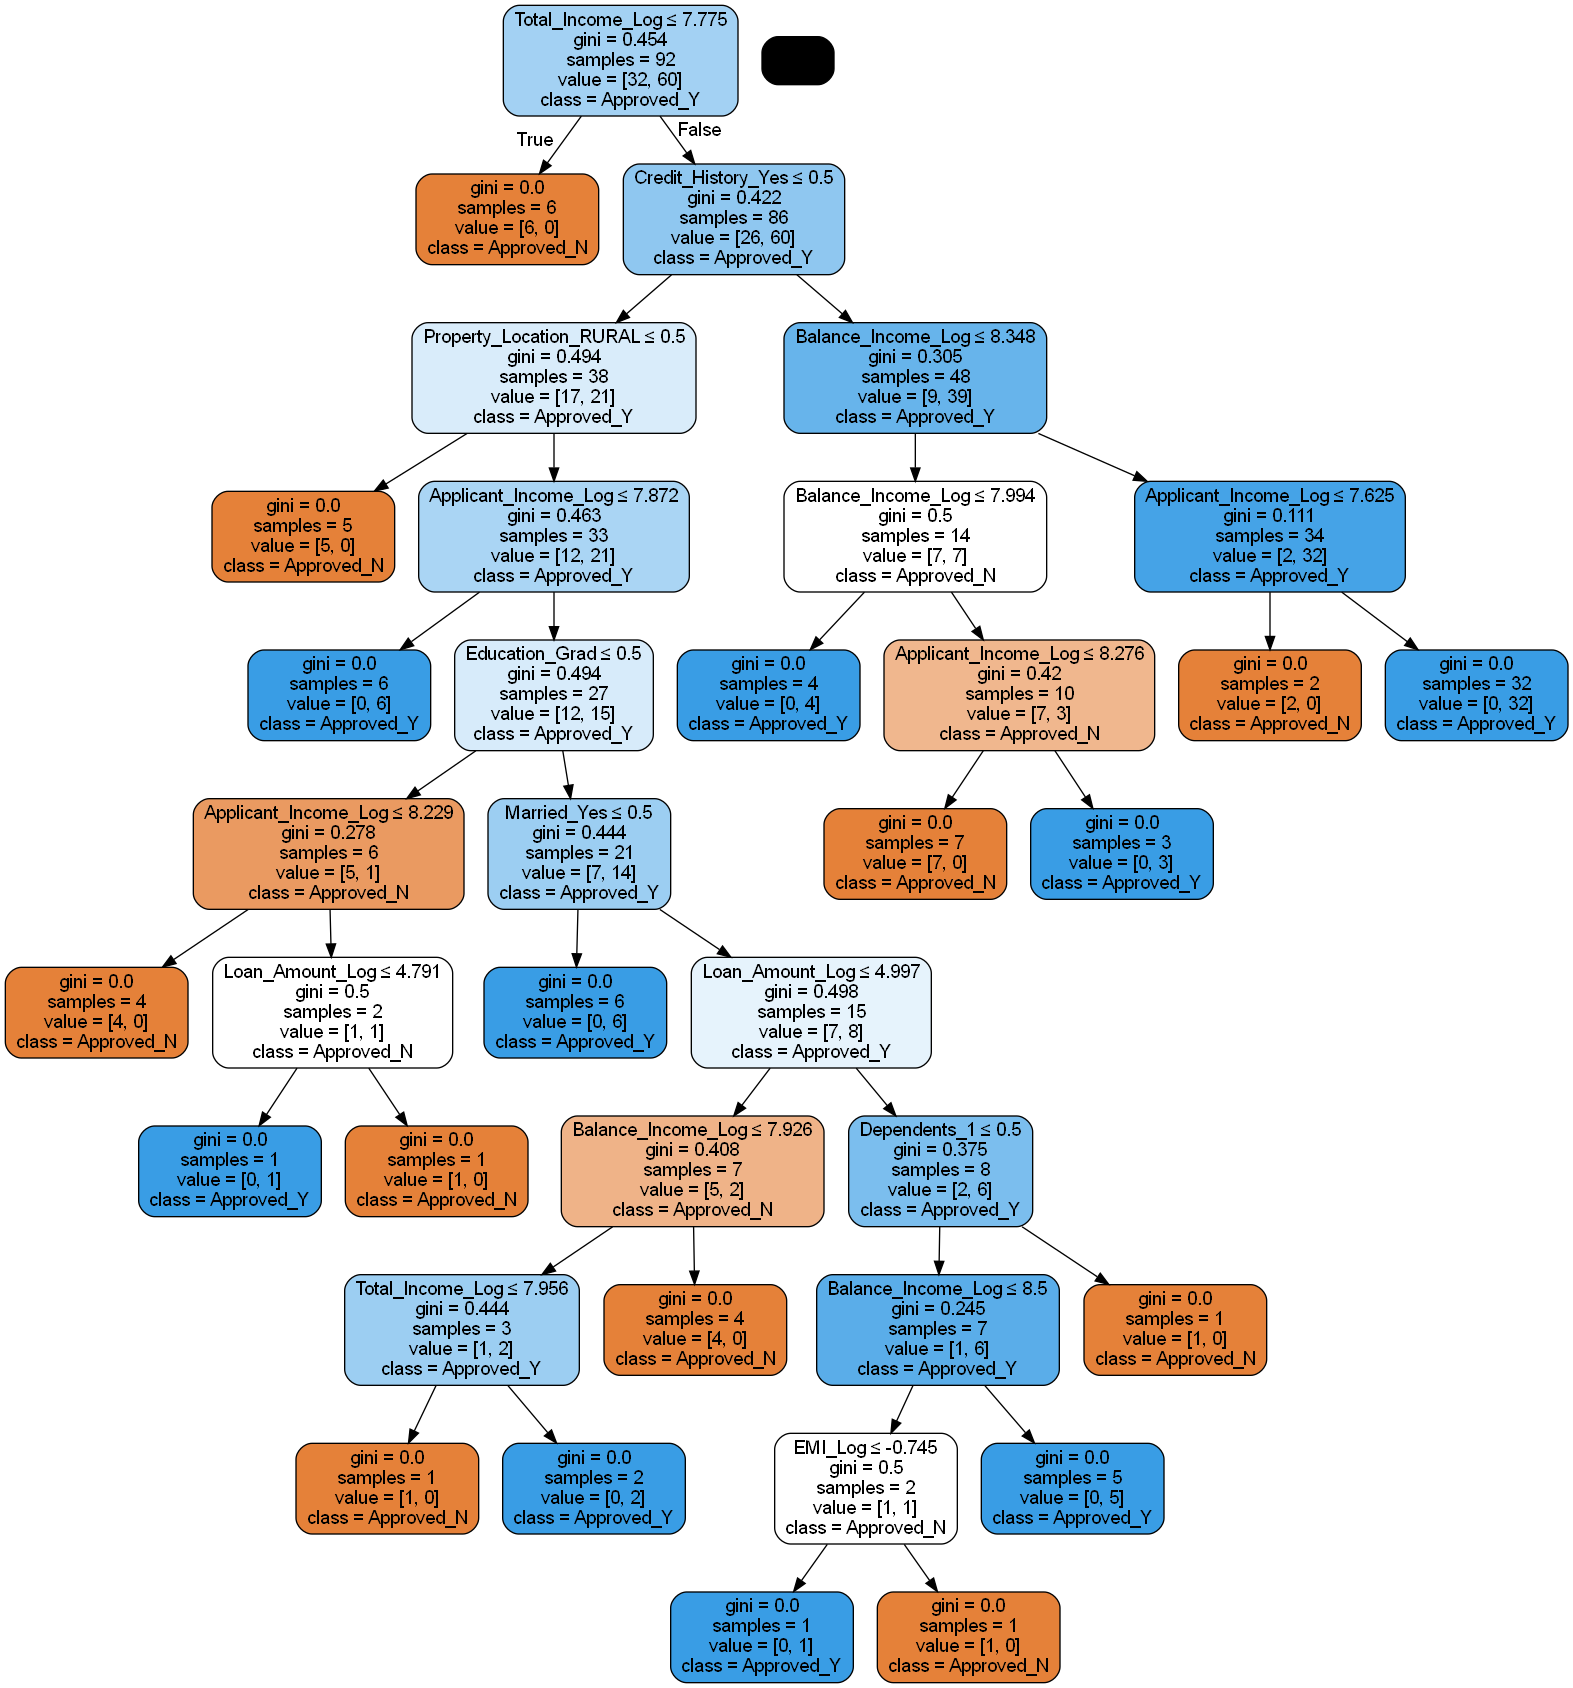

In [191]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [193]:
# Create PDF
graph.write_pdf('./data/loans.pdf')

# create PNG (Image)
graph.write_png('./data/loans.png')

True

In [194]:
y_pred = dtree.predict(X_test)

![image.png](attachment:image.png)

In [195]:
actual_values = np.array(y_test)
predicted_values = np.array(y_pred)

confusion_matrix(actual_values, predicted_values)

array([[7, 1],
       [5, 9]], dtype=int64)

![confusion_matrix](./data/confusion_matrix.png)

Let's compute the accuracy of this model:

In [196]:
# Accuracy = (TP + TN) * 100 / (TP + TN + FP + FN)
accuracy = ((7 + 9) * 100 / ( 7 + 9 + 5 + 1))
accuracy

72.72727272727273

<Axes: >

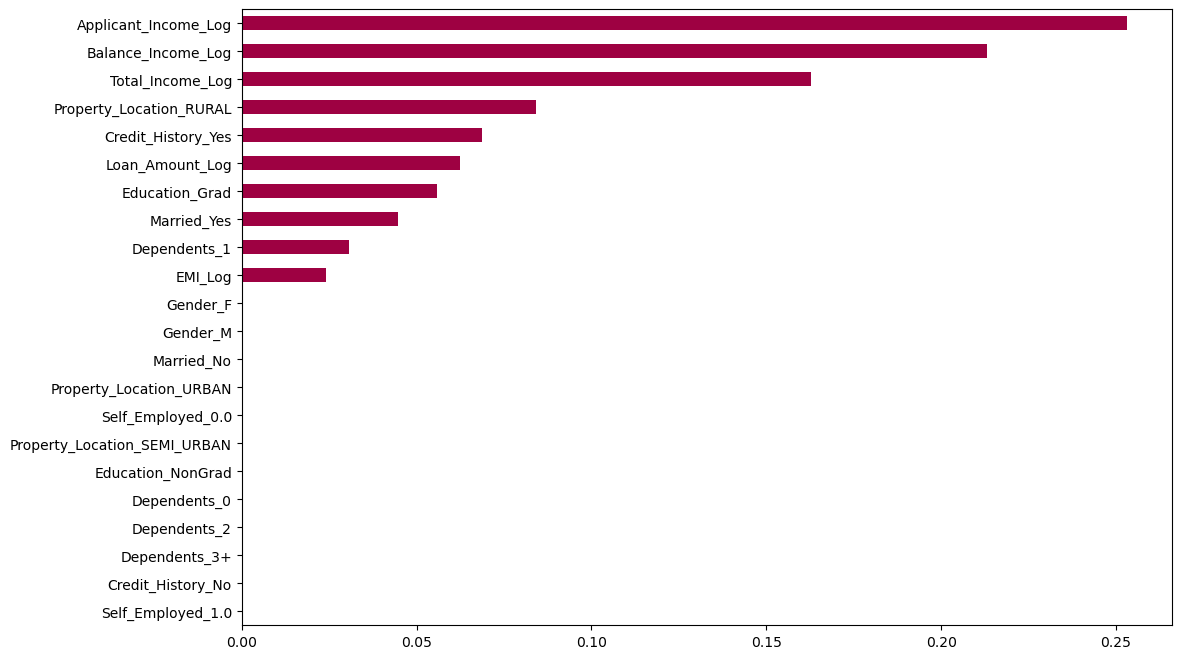

In [197]:
importance = pd.Series(dtree.feature_importances_, index=X.columns).sort_values()
importance.plot(kind='barh', figsize=(12, 8), cmap= cmap_spect)

Again, Applicant_Income and Credit_History is coming out as clear indicator for loan approval prediction.

# 7. Model Selection

- Accuracy of Logistic Regrssion = **57%**
- Average Accuracy of Stratified Logistic Regression model = **71%**
- Accuracy of Decision Tree model = **~73%**

**As the accuracy of Decision Tree Model is better than other 2 model, we use this for loan prediction automation.**